<a href="https://colab.research.google.com/github/sedabicer/GlobalAIHubMachineLearningCourse/blob/main/Homeworks/ML_Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import Boston Dataset from sklearn dataset class
from sklearn.datasets import load_boston
import pandas as pd

In [ ]:
#Explore and analyse raw data
Xb,yb=load_boston(return_X_y=True)

df_boston=pd.DataFrame(Xb,columns=load_boston().feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [ ]:
df_boston[df_boston.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


In [ ]:
df_boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [ ]:
import seaborn as sns
corr= df_boston.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


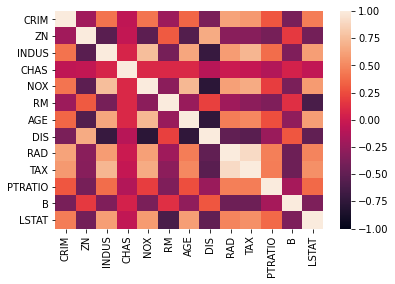

In [ ]:
import seaborn as sns
heat_map=sns.heatmap(corr,vmin=-1,vmax=1)

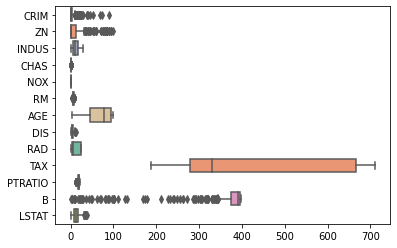

In [ ]:
#Box plot
box_plot = sns.boxplot(data=df_boston, orient="h", palette="Set2")

In [ ]:
#Do preprocessing for regression.
from sklearn import preprocessing

X = df_boston.drop(['CHAS'], axis = 1)
y = df_boston[['CHAS']]

X_new = preprocessing.scale(X)
X_new = pd.DataFrame(X_new, columns = X.columns)

y_new = preprocessing.scale(y)
y_new = pd.DataFrame(y_new, columns = y.columns)

X_new

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [ ]:
# Split the data into a test set and a training set X_train, X_test, y_train, y_test = 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xb,yb,train_size=0.7, test_size=0.3, random_state=42)
X_train.shape

(354, 13)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[2.33681784e-04, 0.00000000e+00, 3.65623822e-02, ...,
        6.48936170e-01, 9.92990065e-01, 9.60264901e-02],
       [1.37713767e-03, 0.00000000e+00, 3.31699962e-01, ...,
        5.53191489e-01, 9.90922386e-01, 2.84492274e-01],
       [1.82494346e-03, 0.00000000e+00, 2.14851112e-01, ...,
        5.63829787e-01, 1.00000000e+00, 2.33995585e-01],
       ...,
       [6.68786251e-05, 8.42105263e-01, 3.01545420e-02, ...,
        4.68085106e-01, 9.84971506e-01, 1.17549669e-01],
       [1.25342233e-01, 0.00000000e+00, 6.36637769e-01, ...,
        8.08510638e-01, 2.76186394e-01, 5.94370861e-01],
       [2.46945108e-03, 0.00000000e+00, 2.77044855e-01, ...,
        8.82978723e-01, 1.77719502e-01, 2.45584989e-01]])

In [ ]:
X_test = scaler.transform(X_test)
X_test

array([[9.29781490e-04, 0.00000000e+00, 1.07048624e-01, ...,
        4.25531915e-01, 9.96469817e-01, 2.01710817e-01],
       [5.32556177e-04, 4.21052632e-01, 1.96004523e-01, ...,
        5.31914894e-01, 1.00000000e+00, 4.96688742e-02],
       [1.08669336e-03, 0.00000000e+00, 1.00000000e+00, ...,
        7.97872340e-01, 9.82878612e-01, 4.50883002e-01],
       ...,
       [5.82091320e-03, 0.00000000e+00, 1.88088956e-01, ...,
        5.10638298e-01, 9.62428766e-01, 8.00220751e-02],
       [6.26299778e-02, 0.00000000e+00, 6.36637769e-01, ...,
        8.08510638e-01, 2.51828131e-01, 3.99834437e-01],
       [1.11454521e-01, 0.00000000e+00, 6.36637769e-01, ...,
        8.08510638e-01, 9.78869333e-01, 4.05905077e-01]])

In [ ]:
#Try Ridge and Lasso Regression models with at least 5 different alpha value for each.
from sklearn.linear_model import  LinearRegression,Ridge,Lasso
ridge_model1 = Ridge(alpha = 0.001)
ridge_model1.fit(X_train, y_train)
print(f'Ridge model 1 coef: {ridge_model1.coef_}')
print("\n")
ridge_model2 = Ridge(alpha = 0.01)
ridge_model2.fit(X_train, y_train)
print(f'Ridge model 2 coef: {ridge_model2.coef_}')
print("\n")
ridge_model3 = Ridge(alpha = 0.05)
ridge_model3.fit(X_train, y_train)
print(f'Ridge model 3 coef: {ridge_model3.coef_}')
print("\n")
ridge_model4 = Ridge(alpha = 0.1)
ridge_model4.fit(X_train, y_train)
print(f'Ridge model 4 coef: {ridge_model4.coef_}')
print("\n")
ridge_model5 = Ridge(alpha = 1)
ridge_model5.fit(X_train, y_train)
print(f'Ridge model 5 coef: {ridge_model5.coef_}')
print("\n")

lasso_model1 = Lasso(alpha = 0.001)
lasso_model1.fit(X_train, y_train)
print(f'Lasso model 1 coef: {lasso_model1.coef_}')
print("\n")
lasso_model2 = Lasso(alpha = 0.01)
lasso_model2.fit(X_train, y_train)
print(f'Lasso model 2 coef: {lasso_model2.coef_}')
print("\n")
lasso_model3 = Lasso(alpha = 0.05)
lasso_model3.fit(X_train, y_train)
print(f'Lasso model 3 coef: {lasso_model3.coef_}')
print("\n")
lasso_model4 = Lasso(alpha = 0.1)
lasso_model4.fit(X_train, y_train)
print(f'Lasso model 4 coef: {lasso_model4.coef_}')
print("\n")
lasso_model5 = Lasso(alpha = 1)
lasso_model5.fit(X_train, y_train)
print(f'Lasso model 5 coef: {lasso_model5.coef_}')
print("\n")

Ridge model 1 coef: [-11.86720418   3.4002461    1.31228081   3.12040955  -7.48978801
  19.94760122  -1.05052401 -15.23645433   5.57996111  -4.55806169
  -8.56007556   4.67712021 -19.82670233]


Ridge model 2 coef: [-11.80237717   3.38591891   1.29833886   3.12555958  -7.46377801
  19.93277109  -1.04891885 -15.18958582   5.55518704  -4.54097936
  -8.55679835   4.67540531 -19.82051035]


Ridge model 3 coef: [-11.52302649   3.32391862   1.23749838   3.14802532  -7.35077565
  19.86679892  -1.04192819 -14.98551811   5.44794163  -4.46717175
  -8.54247169   4.66773198 -19.79225675]


Ridge model 4 coef: [-11.19279077   3.25007574   1.16392043   3.17517907  -7.21520604
  19.7842611   -1.03351523 -14.73971546   5.32009433  -4.37951346
  -8.52507615   4.65803497 -19.75536235]


Ridge model 5 coef: [ -7.4663817    2.38008684   0.17208253   3.54080135  -5.50437853
  18.3522545   -0.93379167 -11.51984429   3.76785686  -3.36786613
  -8.26873116   4.47752661 -18.92289026]


Lasso model 1 coef: [-11.

In [ ]:
#Lasso
print("Lasso Train 1: ", lasso_model1.score(X_train, y_train))
print("Lasso Test 1: ", lasso_model1.score(X_test, y_test))

print("Lasso Train 2: ", lasso_model2.score(X_train, y_train))
print("Lasso Test 2: ", lasso_model4.score(X_test, y_test))

print("Lasso Train 3: ", lasso_model3.score(X_train, y_train))
print("Lasso Test 3: ", lasso_model3.score(X_test, y_test))

print("Lasso Train 4: ", lasso_model4.score(X_train, y_train))
print("Lasso Test 4: ", lasso_model4.score(X_test, y_test))

print("Lasso Train 5: ", lasso_model5.score(X_train, y_train))
print("Lasso Test 5: ", lasso_model5.score(X_test, y_test))

#Ridge
print("Ridge Train 1: ", ridge_model1.score(X_train, y_train))
print("Ridge Test 1: ", ridge_model1.score(X_test, y_test))

print("Ridge Train 2: ", ridge_model2.score(X_train, y_train))
print("Ridge Test 2: ", ridge_model2.score(X_test, y_test))

print("Ridge Train 3: ", ridge_model3.score(X_train, y_train))
print("Ridge Test 3: ", ridge_model3.score(X_test, y_test))

print("Ridge Train 4: ", ridge_model4.score(X_train, y_train))
print("Ridge Test 4: ", ridge_model4.score(X_test, y_test))

print("Ridge Train 5: ", ridge_model5.score(X_train, y_train))
print("Ridge Test 5: ", ridge_model5.score(X_test, y_test))




Lasso Train 1:  0.7434862787409253
Lasso Test 1:  0.7112878183807602
Lasso Train 2:  0.7421709723575363
Lasso Test 2:  0.658725530223645
Lasso Train 3:  0.7227570612278937
Lasso Test 3:  0.6799044322372972
Lasso Train 4:  0.7037487290058935
Lasso Test 4:  0.658725530223645
Lasso Train 5:  0.2634363664212842
Lasso Test 5:  0.2456633144121433
Ridge Train 1:  0.7434997445897669
Ridge Test 1:  0.7112343739146099
Ridge Train 2:  0.7434988983489206
Ridge Test 2:  0.7113082949586751
Ridge Train 3:  0.7434790467978905
Ridge Test 3:  0.7116076854031206
Ridge Train 4:  0.74342002945905
Ridge Test 4:  0.711919965951638
Ridge Train 5:  0.7387251833812362
Ridge Test 5:  0.7110209811587719
